# Exploratory Data Analysis

In [1]:
import os
import re
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import utils

In [2]:

data_set = tf.keras.utils.get_file(
    fname="imdb.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True
)

## preprocessing

In [3]:
def directory_data(directory): # 데이터 존재하는 디렉토리를 인자로 받음
    data ={}
    data["review"]=[]
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path),"r",encoding="utf-8") as file: #파일경로를 줘서 읽기 전용으로 하나씩 가져온다
            data["review"].append(file.read())
    
    return pd.DataFrame.from_dict(data) #딕셔너리를 판다스 데이터프레임으로 만듦


In [4]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0

    return pd.concat([pos_df,neg_df])
    

In [5]:
train_df = data(os.path.join(os.path.dirname(data_set),"aclImdb","train"))
test_df = data(os.path.join(os.path.dirname(data_set),"aclImdb","test"))

#data_set이 가리키는 path 는 ~.keras\datasets 이다


In [6]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [11]:
reviews = list(train_df['review']) # 리뷰 저장 리스트 

tokenized_reviews = [r.split() for r in reviews] #문장 리스트를 토크나이징

review_len_by_token = [len(t) for t in tokenized_reviews]# 리스트의 각 길이 저장

review_len_by_eumjeol = [len(s.replace(' ','')) for s in reviews]


Text(0, 0.5, 'Number of Reviews')

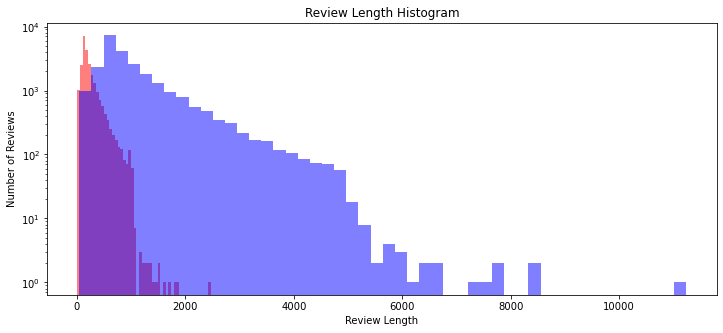

In [12]:
import matplotlib.pyplot as plt
#figsize:(가로,세로)
plt.figure(figsize=(12, 5))

#히스토그램 설정
# bins: 히스토그램 값에 대한 버킷 범위
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

## 데이터 분포 통계치

In [14]:
import numpy as np
print('문장 최대 길이 : {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차 :{:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))


문장 최대 길이 : 2470
문장 최소 길이 : 10
문장 평균 길이 : 233.79
문장 길이 표준편차 :173.73
문장 중간 길이: 174.0
